In [1]:
import os
par_dir = os.path.abspath(os.path.join(os.getcwd(),os.pardir))
os.chdir(par_dir)

In [2]:
import pandas as pd
df =pd.read_csv('211210-DRM-total.csv')

In [3]:
pre_df = df.iloc[:,71:76]


In [4]:
react_df= df.iloc[:,76:]

In [5]:
react_df

,Reaction T,Reaction CH4,Reaction CO2,Reaction Ar,Reaction N2,Reaction He,GHSV,Time on stream,CH4 Conversion
0,600,50.0,50.0,0.0,0.0,0.0,4.0,60,21
1,600,50.0,50.0,0.0,0.0,0.0,4.0,60,39
2,600,50.0,50.0,0.0,0.0,0.0,4.0,60,45
3,600,50.0,50.0,0.0,0.0,0.0,4.0,60,48
4,600,50.0,50.0,0.0,0.0,0.0,4.0,60,44
...,...,...,...,...,...,...,...,...,...
5903,700,25.0,25.0,0.0,50.0,0.0,0.5,120,81
5904,750,25.0,25.0,0.0,50.0,0.0,0.5,120,90
5905,800,25.0,25.0,0.0,50.0,0.0,0.5,120,95
5906,850,25.0,25.0,0.0,50.0,0.0,0.5,120,97


In [6]:
react_df['CO2/CH4'] = df.loc[:,'Reaction CO2']/ df.loc[:,'Reaction CH4']


In [7]:
react_df['CH4 GHSV'] = react_df.loc[:,'Reaction CH4']*react_df.loc[:,'GHSV']/100
react_df['CO2 GHSV'] = react_df.loc[:,'Reaction CO2']*react_df.loc[:,'GHSV']/100

In [8]:
import numpy as np

X = react_df['CH4 Conversion'] / 100.0                 
yCH4 = react_df['Reaction CH4'] / 100.0
eps = 2.0 * yCH4

react_df['Reaction_Constant'] = ( -eps*X - (1.0 + eps)*np.log(1.0 - X) ) * react_df['GHSV']


In [9]:
react_df['Throughput']=react_df['Time on stream']*react_df['GHSV']

In [10]:
react_df = react_df.loc[:,['Reaction T','CO2/CH4','CH4 GHSV','CO2 GHSV','Throughput','CH4 Conversion','Reaction_Constant']]

In [11]:
react_df.head()

,Reaction T,CO2/CH4,CH4 GHSV,CO2 GHSV,Throughput,CH4 Conversion,Reaction_Constant
0,600,1.0,2.0,2.0,240.0,21,1.045779
1,600,1.0,2.0,2.0,240.0,39,2.394371
2,600,1.0,2.0,2.0,240.0,45,2.982696
3,600,1.0,2.0,2.0,240.0,48,3.311412
4,600,1.0,2.0,2.0,240.0,44,2.878548


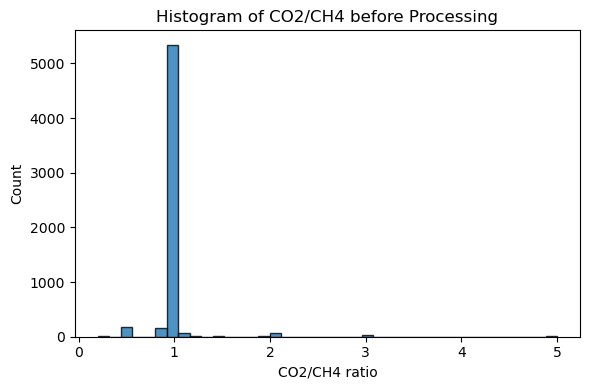

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(
    react_df['CO2/CH4'],
    bins=40,
    edgecolor='black',
    alpha=0.8
)

plt.xlabel('CO2/CH4 ratio')
plt.ylabel('Count')
plt.title('Histogram of CO2/CH4 before Processing')

plt.tight_layout()
plt.show()


In [13]:
import numpy as np
react_df['CO2/CH4']= np.log(react_df['CO2/CH4'])

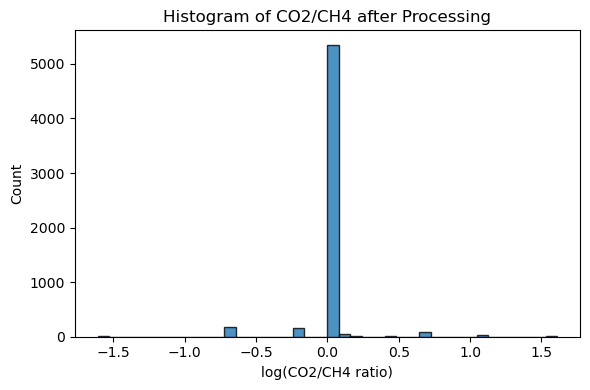

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(
    react_df['CO2/CH4'],
    bins=40,
    edgecolor='black',
    alpha=0.8
)

plt.xlabel('log(CO2/CH4 ratio)')
plt.ylabel('Count')
plt.title('Histogram of CO2/CH4 after Processing')

plt.tight_layout()
plt.show()


In [15]:
import numpy as np
for col in ['CO2 GHSV','CH4 GHSV','Throughput']:
    react_df[f'{col}']= np.log1p(react_df[col])

In [16]:
pre_re_df = pd.concat([pre_df,react_df],axis=1)
pre_re_without_df = pre_re_df.drop(columns=['Throughput'])

In [17]:
import  numpy as np
np.save('./data/pre_re_fin_throughput.npy',pre_re_df)
np.save('./data/pre_re_without_throughput.npy',pre_re_without_df)

## 역변환

In [18]:
for col in ['CO2 GHSV','CH4 GHSV','Throughput']:
    react_df[col] = np.expm1(react_df[col])
    pre_re_df[col] = np.expm1(pre_re_df[col])
react_df['CO2/CH4'] = np.exp(react_df['CO2/CH4'])
pre_re_df['CO2/CH4'] = np.exp(pre_re_df['CO2/CH4'])

In [19]:
pre_re_df

,Calcination T,Calcination time,Reduction T,Reduction time,Reduction H2,Reaction T,CO2/CH4,CH4 GHSV,CO2 GHSV,Throughput,CH4 Conversion,Reaction_Constant
0,700,5.0,800,2.0,33.33,600,1.0,2.000,2.000,240.0,21,1.045779
1,700,5.0,800,2.0,33.33,600,1.0,2.000,2.000,240.0,39,2.394371
2,700,5.0,800,2.0,33.33,600,1.0,2.000,2.000,240.0,45,2.982696
3,700,5.0,800,2.0,33.33,600,1.0,2.000,2.000,240.0,48,3.311412
4,700,5.0,800,2.0,33.33,600,1.0,2.000,2.000,240.0,44,2.878548
...,...,...,...,...,...,...,...,...,...,...,...,...
5903,300,6.0,1000,24.0,40.00,700,1.0,0.125,0.125,60.0,81,1.043048
5904,300,6.0,1000,24.0,40.00,750,1.0,0.125,0.125,60.0,90,1.501939
5905,300,6.0,1000,24.0,40.00,800,1.0,0.125,0.125,60.0,95,2.009299
5906,300,6.0,1000,24.0,40.00,850,1.0,0.125,0.125,60.0,97,2.387418
